# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


In [3]:
# select limited number of cities to have trial run
# cities_test = cities[0:5]
# cities_test

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
url2 = url + "APPID=" +  weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    #city_url = url2 + "&q=" + city
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()

    # Get the temperature from the response
    print(f"The weather API responded for city {city} with: {weather_json}.")

    #Log the url, record, and set numbers
    print(f"Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
The weather API responded for city adamstown with: {'coord': {'lon': -130.1015, 'lat': -25.066}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23.52, 'feels_like': 23.47, 'temp_min': 23.52, 'temp_max': 23.52, 'pressure': 1018, 'humidity': 59, 'sea_level': 1018, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 11.86, 'deg': 120, 'gust': 11.89}, 'clouds': {'all': 100}, 'dt': 1711834859, 'sys': {'country': 'PN', 'sunrise': 1711810108, 'sunset': 1711852833}, 'timezone': -28800, 'id': 4030723, 'name': 'Adamstown', 'cod': 200}.
Processing Record 1 of Set 1 | adamstown
The weather API responded for city tayu with: {'coord': {'lon': 111.0518, 'lat': -6.5397}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 25.19, 'feels_like': 26.11, 'temp_min': 25.19, 'temp_max': 2

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,23.52,59,100,11.86,PN,1711834859
1,tayu,-6.5397,111.0518,25.19,90,19,3.13,ID,1711835159
2,waitangi,-43.9535,-176.5597,15.46,97,100,3.58,NZ,1711835159
3,severo-yeniseyskiy,60.3725,93.0408,-1.90,95,100,2.68,RU,1711835160
4,edinburgh of the seven seas,-37.0676,-12.3116,14.42,62,89,0.57,SH,1711835160


In [10]:
import os

# Create the output directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.52,59,100,11.86,PN,1711834859
1,tayu,-6.5397,111.0518,25.19,90,19,3.13,ID,1711835159
2,waitangi,-43.9535,-176.5597,15.46,97,100,3.58,NZ,1711835159
3,severo-yeniseyskiy,60.3725,93.0408,-1.90,95,100,2.68,RU,1711835160
4,edinburgh of the seven seas,-37.0676,-12.3116,14.42,62,89,0.57,SH,1711835160


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

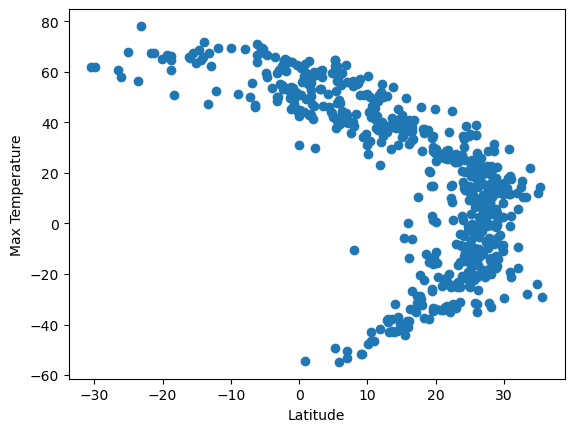

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

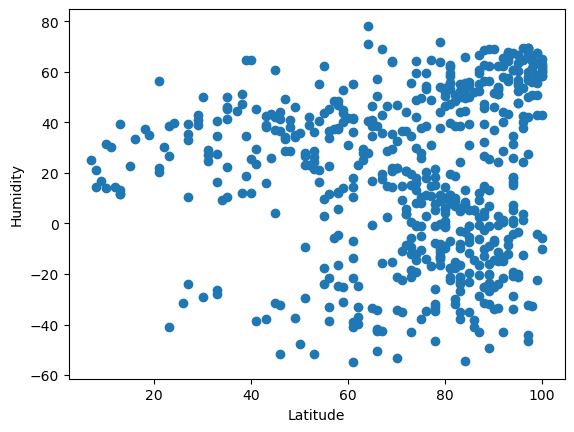

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

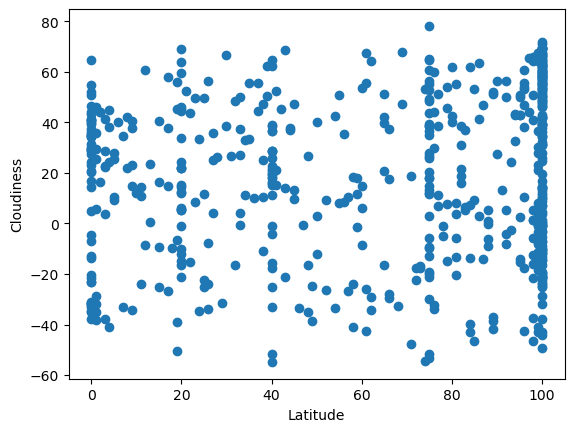

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

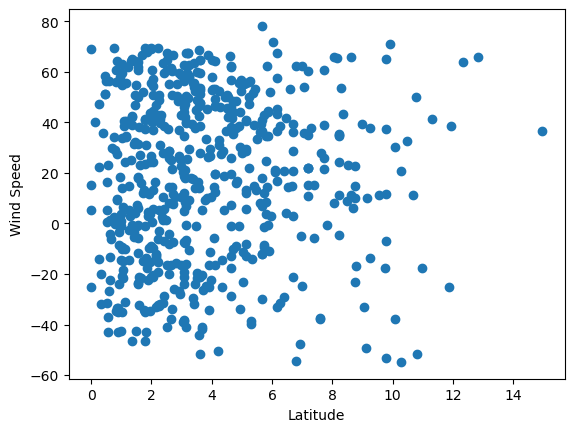

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots and intro 
def plot_linear_regression(x_values,y_values,title,text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,severo-yeniseyskiy,60.3725,93.0408,-1.90,95,100,2.68,RU,1711835160
6,constantia,44.1833,28.6500,10.39,83,2,4.93,RO,1711835095
7,bilibino,68.0546,166.4372,-25.12,93,69,1.85,RU,1711835161
9,tiksi,71.6872,128.8694,-13.99,79,100,6.02,RU,1711835162
10,novyy urgal,51.0736,132.5642,-9.00,91,89,0.45,RU,1711835162


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.52,59,100,11.86,PN,1711834859
1,tayu,-6.5397,111.0518,25.19,90,19,3.13,ID,1711835159
2,waitangi,-43.9535,-176.5597,15.46,97,100,3.58,NZ,1711835159
4,edinburgh of the seven seas,-37.0676,-12.3116,14.42,62,89,0.57,SH,1711835160
5,new norfolk,-42.7826,147.0587,13.84,87,99,0.56,AU,1711835160


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8680071454997192


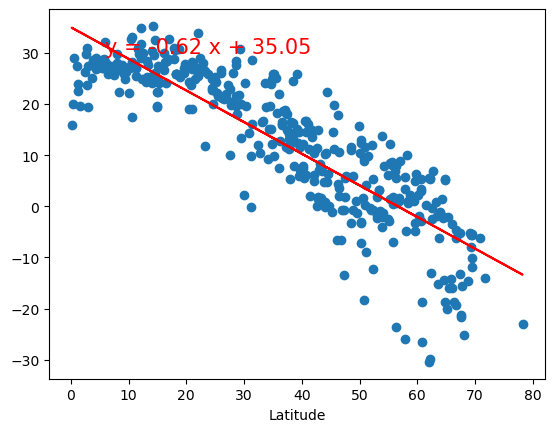

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.7137405111868049


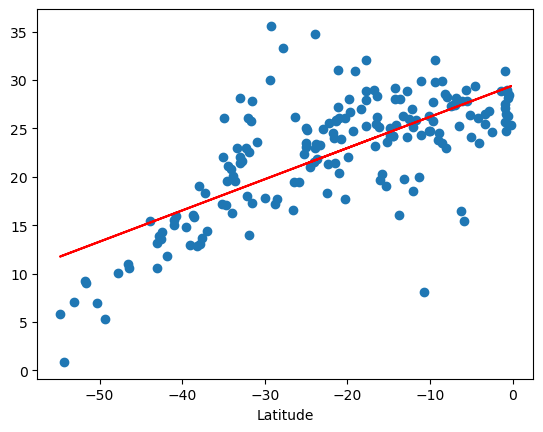

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** Northern Hemi: strong negative correlation between latitude and Temp

Southern Hemi: relatively positive correlation between latitude and Temp

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2495584065902247


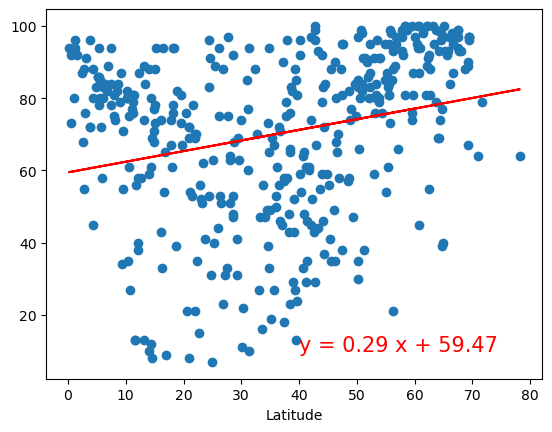

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.30012676186269904


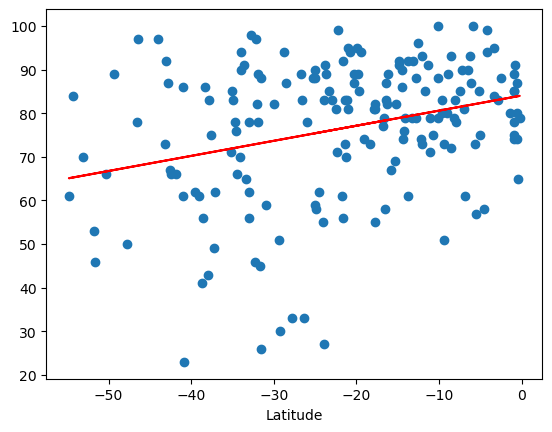

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship: Northern Hemi:  weak positive correlation between latitude and Humidty

Southern Hemi:  weak positive correlation between latitude and Humidty


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.23691399770341592


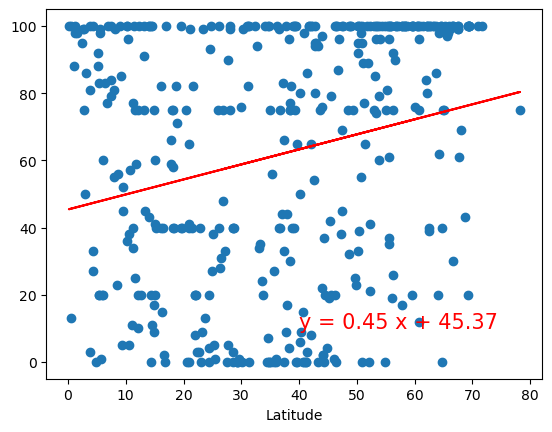

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.19317271970763103


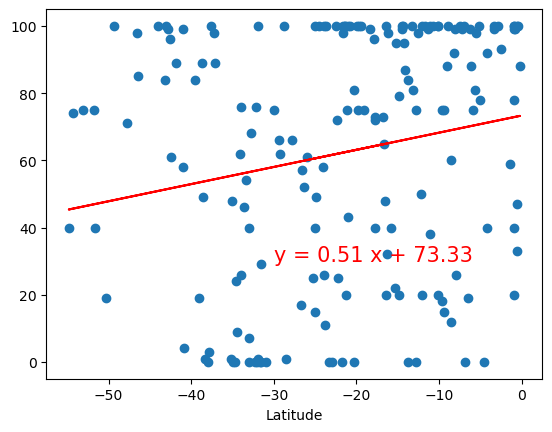

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:Northern Hemi:  weak positive correlation between latitude and cloudiness

Southern Hemi:  weak positive correlation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.01919189347455554


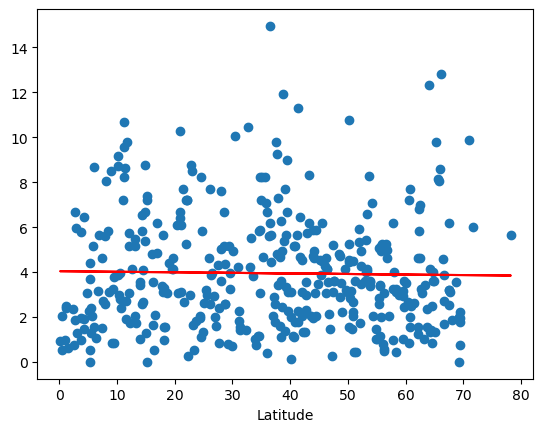

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.13210318402413465


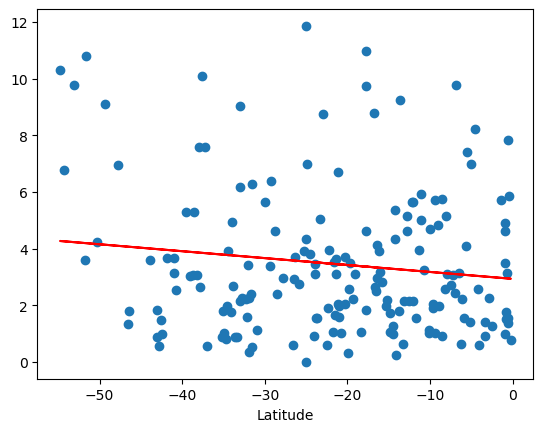

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:Northern Hemi:  near no correlation between latitude and wind speed

Southern Hemi:  weak negative correlation between latitude and wind speed